1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

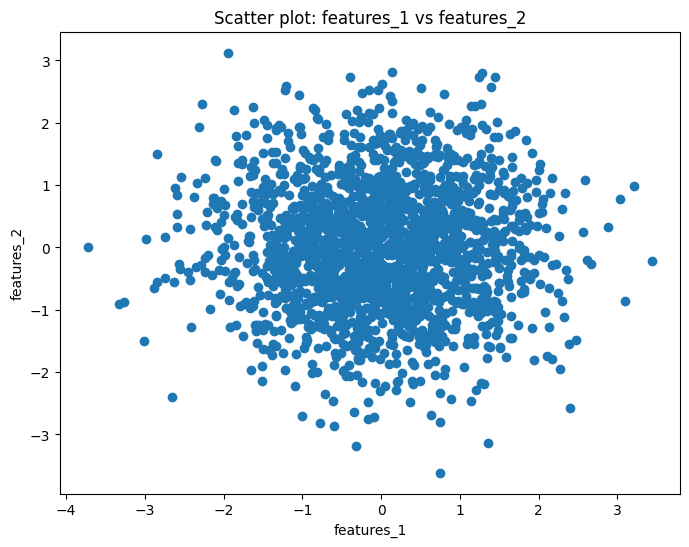

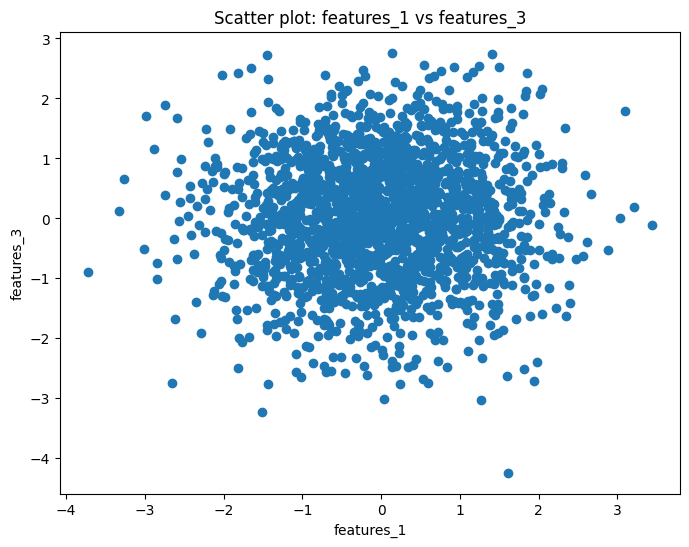

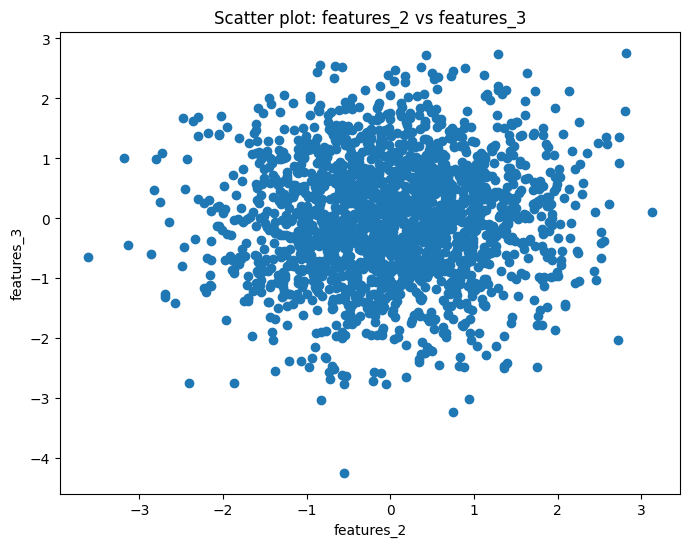

Correlation Matrix:
             features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000
The values of all correlations between all features are very low and this is a clear indicator of a very weak correlation between them.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import itertools
import scipy

#Load the CSV file into a pandas DataFrame
file_path = './regression_generated.csv'
data = pd.read_csv(file_path)

features = ['features_1', 'features_2', 'features_3']
combinations = list(itertools.combinations(features, 2))

for feature_x, feature_y in combinations:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature_x], data[feature_y])
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f'Scatter plot: {feature_x} vs {feature_y}')
    plt.show()

correlation_matrix = data[features].corr()

print("Correlation Matrix:\n",correlation_matrix)

print("The values of all correlations between all features are very low and this is a clear indicator of a very weak correlation between them.")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

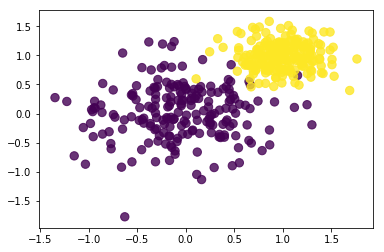

In [7]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

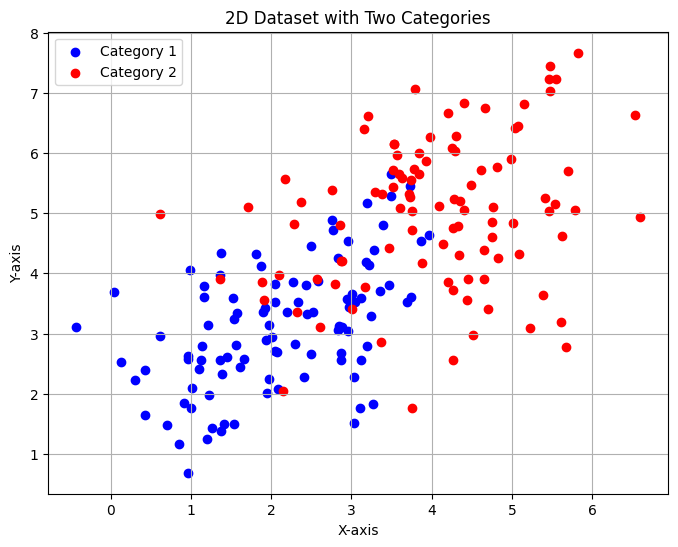

In [8]:
def generate_2d_gaussian(mean, cov_matrix, num_samples):
    samples = np.random.multivariate_normal(mean, cov_matrix, size=num_samples)
    return samples

#here we set the mean, covariance matrix and number of samples for category 1
mean_1 = [2, 3]
cov_matrix_1 = [[1, 0.5], [0.5, 1]]
num_samples_category_1 = 100

#here we set the mean, covariance matrix and number of samples for category 2
mean_2 = [4, 5]
cov_matrix_2 = [[1.2, 0.3], [0.3, 1.5]]
num_samples_category_2 = 100

category_1 = np.random.multivariate_normal(mean_1, cov_matrix_1, size=num_samples_category_1)
category_2 = np.random.multivariate_normal(mean_2, cov_matrix_2, size=num_samples_category_2)

plt.figure(figsize=(8, 6))
plt.scatter(category_1[:, 0], category_1[:, 1], color='blue', label='Category 1')
plt.scatter(category_2[:, 0], category_2[:, 1], color='red', label='Category 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Dataset with Two Categories')
plt.legend()
plt.grid(True)
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [9]:
# with open('residuals_261.pkl', 'rb') as f:
#     data = pickle.load(f)

######### I COULD NOT CORRECTLY CONVERT THE 'DATA' VARIABLE INTO pd.DataFrame, AND I COULD NOT FIGURE OUT WHAT WAS CAUSING THE ERROR
# df = pd.DataFrame(data) ############### THIS LINE WAS THE PROBLEM

# cleaned_df = df[abs(df['residuals']) < 2]

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


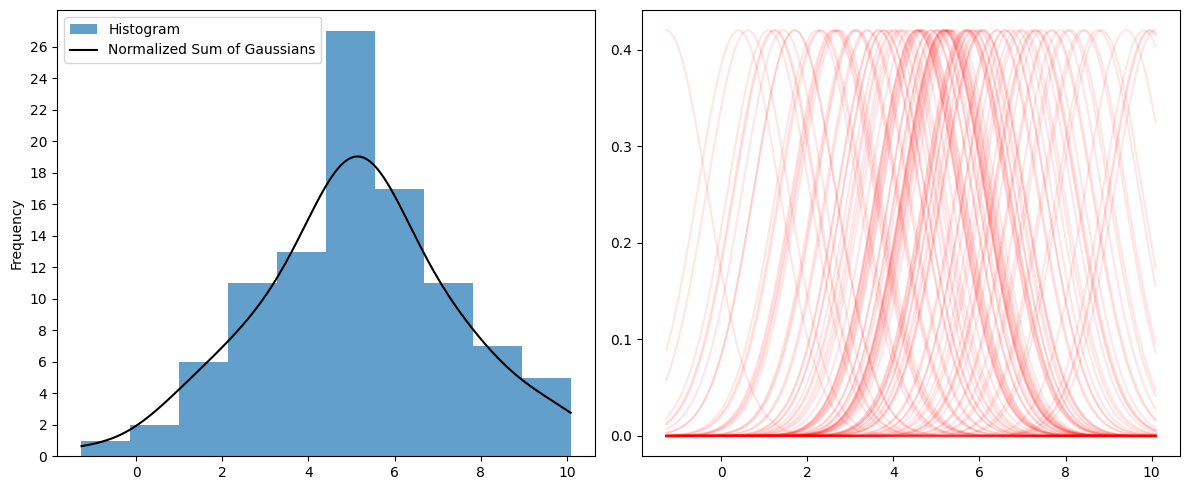

In [10]:
#normally distributed data
np.random.seed(8)
N = 100
mean = 5
std = 2
x = np.random.normal(mean, std, N)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
hist, bins, _ = plt.hist(x, bins=10, alpha=0.7, label='Histogram')
errors = np.sqrt(hist)

plt.ylabel('Frequency')
plt.yticks(np.arange(0, max(hist) + 1, 2))

#plot each gaussian function
plt.subplot(1, 2, 2)
x_values = np.linspace(min(x), max(x), 1000)

std_param = 1.06 * np.std(x) * N ** (-1 / 5)
gaussians = []
for value in x:
    gaussian = scipy.stats.norm.pdf(x_values, value, std_param)
    plt.plot(x_values, gaussian, 'r-', alpha=0.1)
    gaussians.append(gaussian)

sum_gaussians = np.sum(gaussians, axis=0)
normalized_sum = sum_gaussians * (np.sum(hist) / scipy.integrate.trapz(sum_gaussians, x=x_values))

plt.subplot(1, 2, 1)
plt.plot(x_values, normalized_sum, 'k-', label='Normalized Sum of Gaussians')
plt.legend()

plt.tight_layout()
plt.show()
